In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../clean_data/after_clean.csv')
data.head()

,Unnamed: 0,Year,Jurisdiction,Gender,Average scale score
0,0,2022,National,Male,239.0
1,1,2022,National,Female,233.0
2,2,2022,Alabama,Male,233.0
3,3,2022,Alabama,Female,228.0
4,4,2022,Alaska,Male,224.0


In [3]:
pivot_table = data.pivot_table(
    values='Average scale score', 
    index=['Jurisdiction', 'Year'], 
    columns='Gender'
    #,aggfunc='first'
)

# Calculating the gap between Female and Male values
pivot_table['Gap'] = pivot_table['Male'] - pivot_table['Female']

pivot_table.to_csv('../clean_data/gap.csv')

In [4]:
pivot_table

Gender             Female   Male  Gap
Jurisdiction Year                    
Alabama      2000   219.0  216.0 -3.0
             2003   223.0  223.0  0.0
             2005   225.0  225.0  0.0
             2007   228.0  229.0  1.0
             2009   228.0  228.0  0.0
...                   ...    ...  ...
Wyoming      2013   246.0  247.0  1.0
             2015   246.0  248.0  2.0
             2017   246.0  249.0  3.0
             2019   244.0  248.0  4.0
             2022   241.0  246.0  5.0

[561 rows x 3 columns]

In [5]:
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:50]
states_11= data['Jurisdiction'].unique()[50:]

In [6]:
def plot_state_gap(state):
    state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
    y_min, y_max = -10, 10
    plt.figure(figsize=(10, 6))
    plt.plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
    plt.title(f'Gender Gap Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Gap (Male - Female)')
    plt.ylim(y_min,y_max)
    plt.grid(True)
    plt.legend()
    plt.style.use('my_style')
    plt.show()

# Plotting the gap for the first state in the sample
def ploting(states):
    i=1
    for i in range(len(states)):
        plot_state_gap(states[i])
        i+=1

In [7]:
import matplotlib.pyplot as plt

def plotting(states):
    plt.style.use('my_style')  # Apply the style at the beginning
    
    # Determine the number of subplots needed: one for each state
    n_states = len(states)
    
    # Create subplots with a shared y-axis (if desired), arranged in a row
    fig, axs = plt.subplots(1, n_states, figsize=(5 * n_states, 5), sharey=True)
    
    # If there's only one state, axs might not be an array, so we put it in a list
    if n_states == 1:
        axs = [axs]
    
    for i, state in enumerate(states):
        state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
        axs[i].plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
        axs[i].set_title(f'Gender Gap Over Years in {state}')
        axs[i].set_xlabel('Year')
        if i == 0:  # Only add y-label to the first plot to avoid repetition
            axs[i].set_ylabel('Gap (Male - Female)')
        axs[i].set_ylim(-10, 10)
        axs[i].grid(True)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Make sure to define 'pivot_table' and 'states' before calling this function.
# plotting(states, pivot_table)


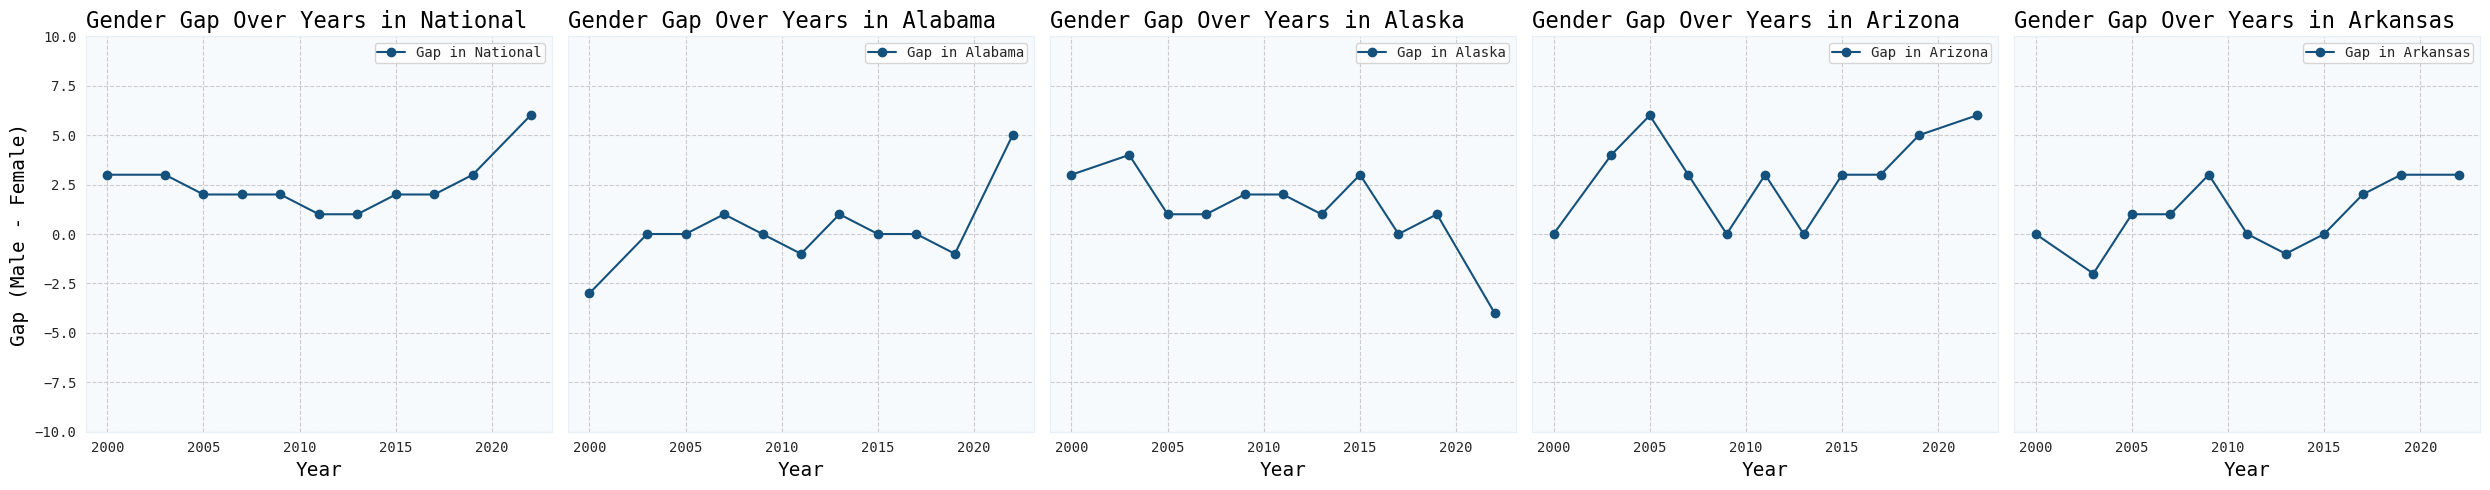

In [8]:
plotting(states_1)

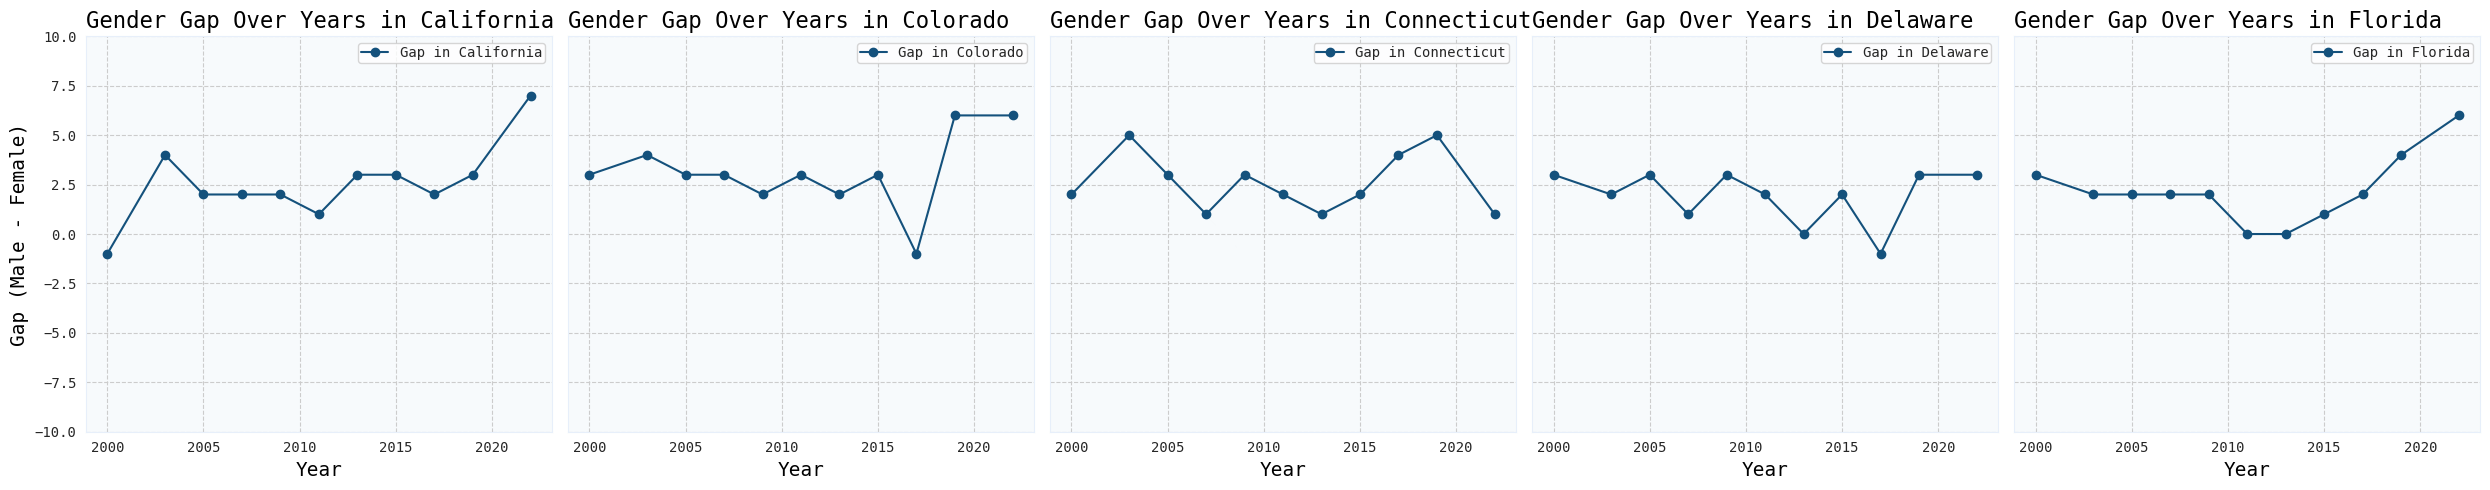

In [9]:
plotting(states_2)

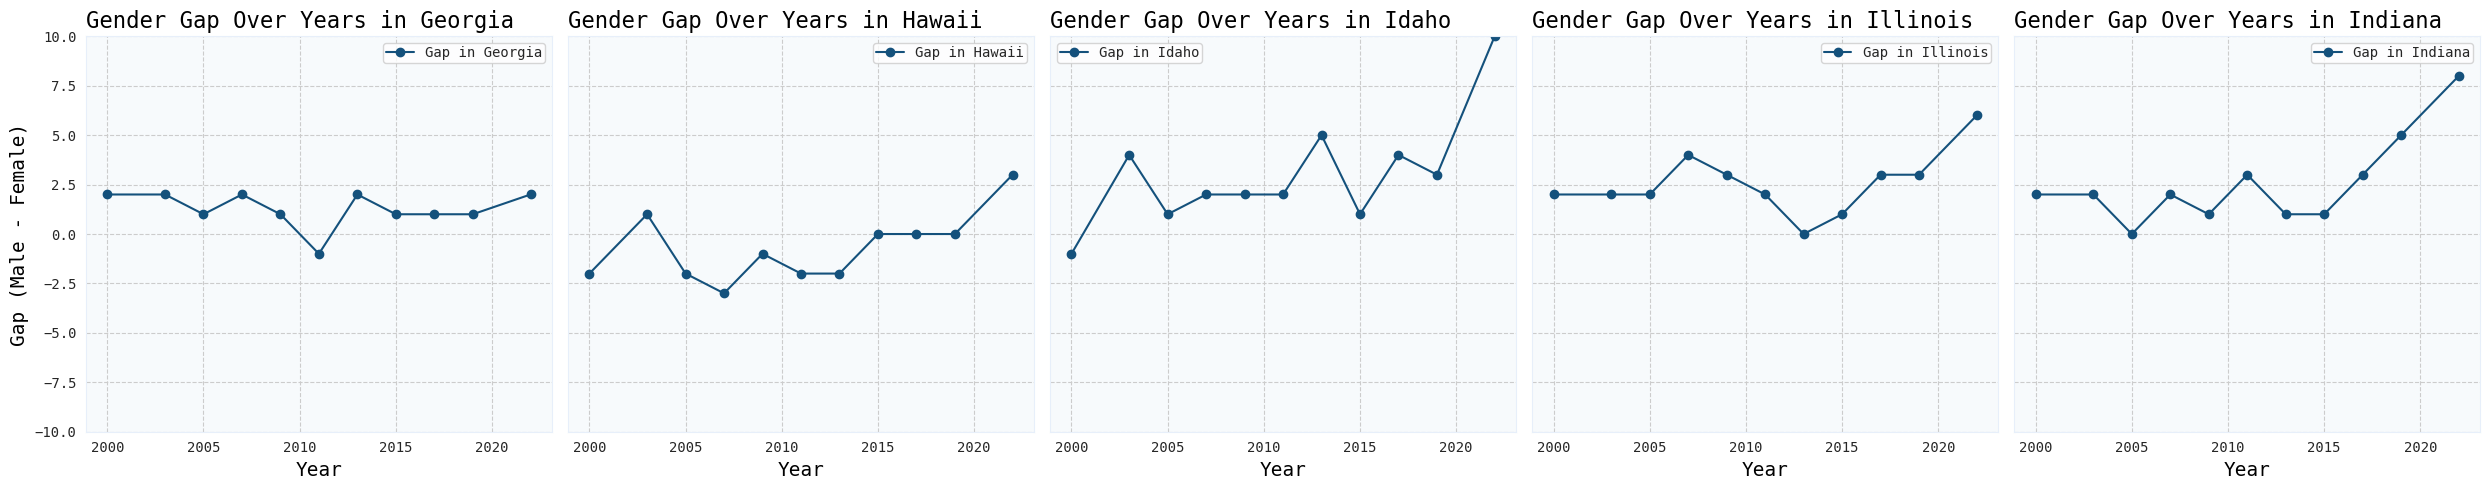

In [10]:
plotting(states_3)

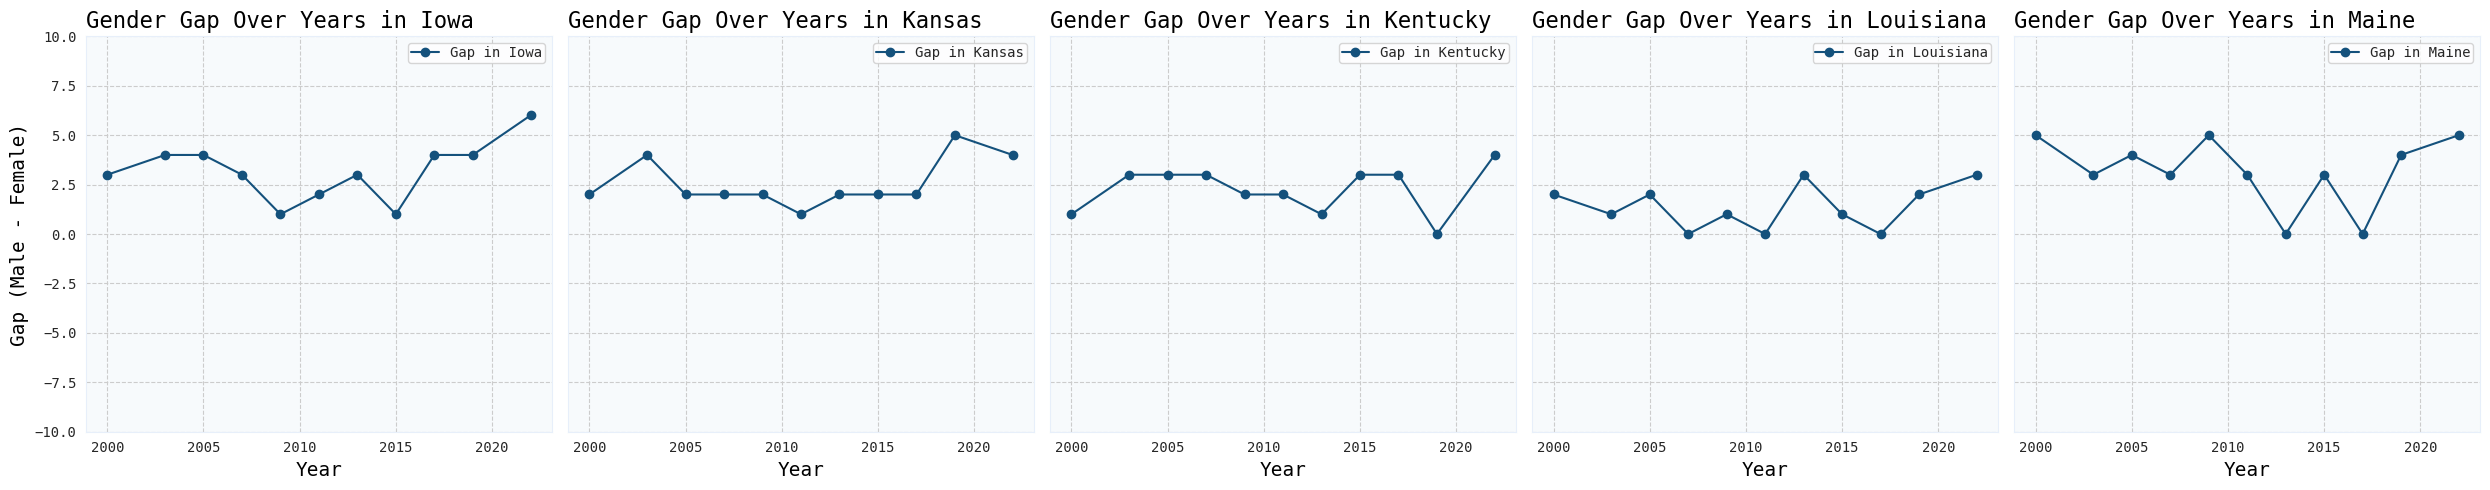

In [11]:
plotting(states_4)

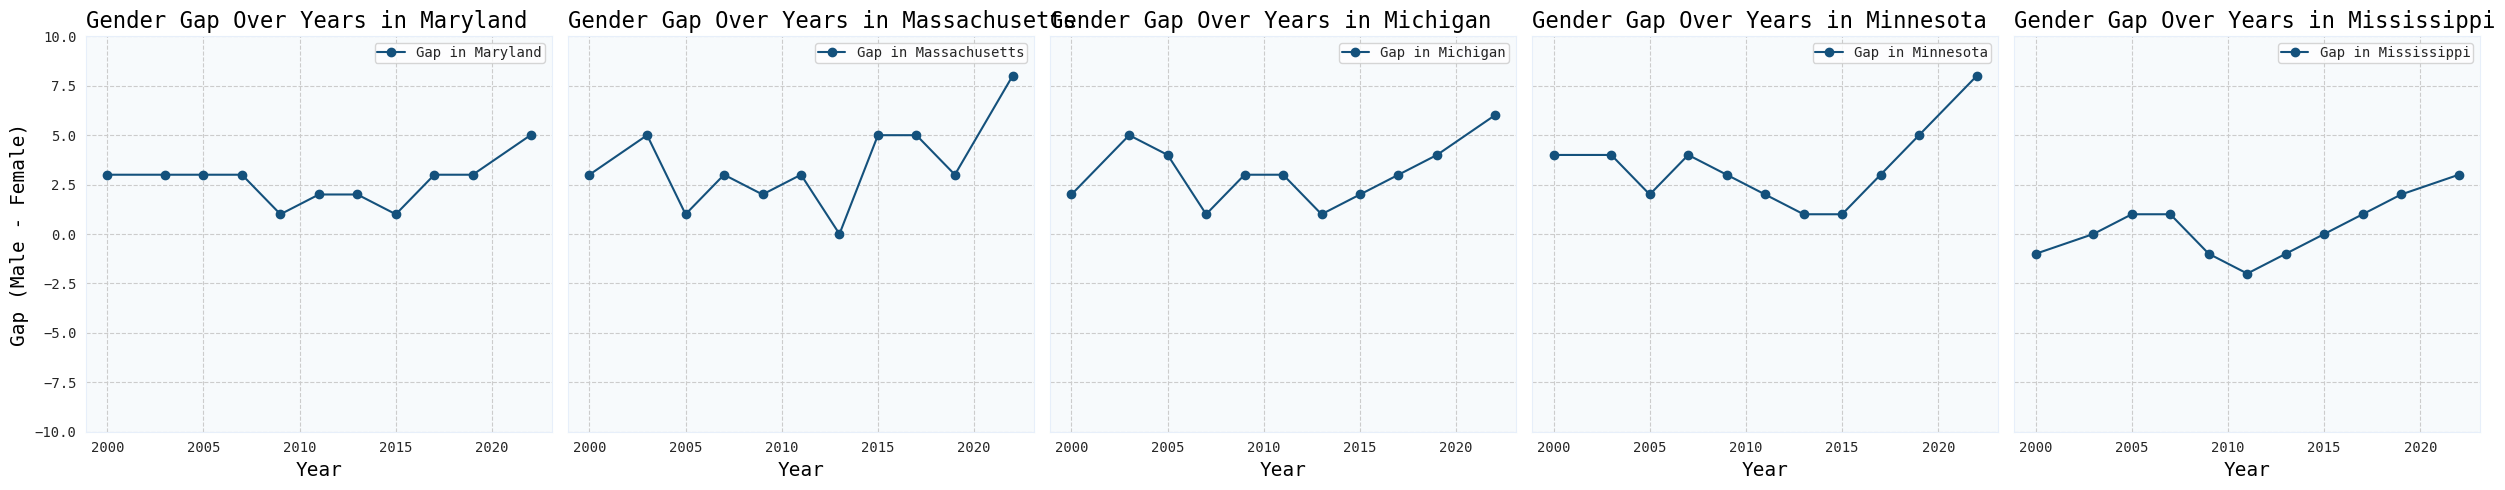

In [12]:
plotting(states_5)

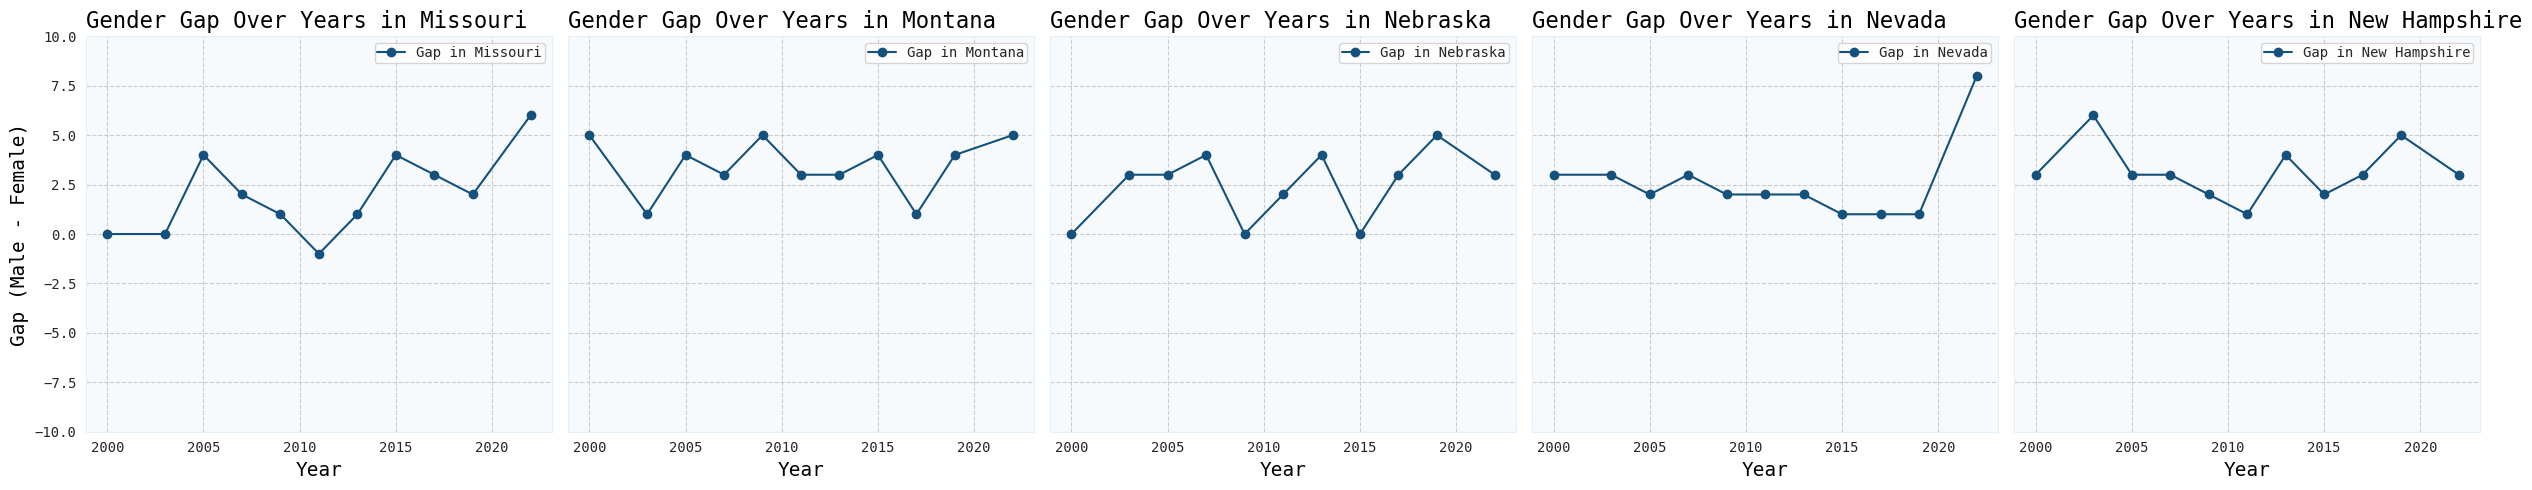

In [13]:
plotting(states_6)

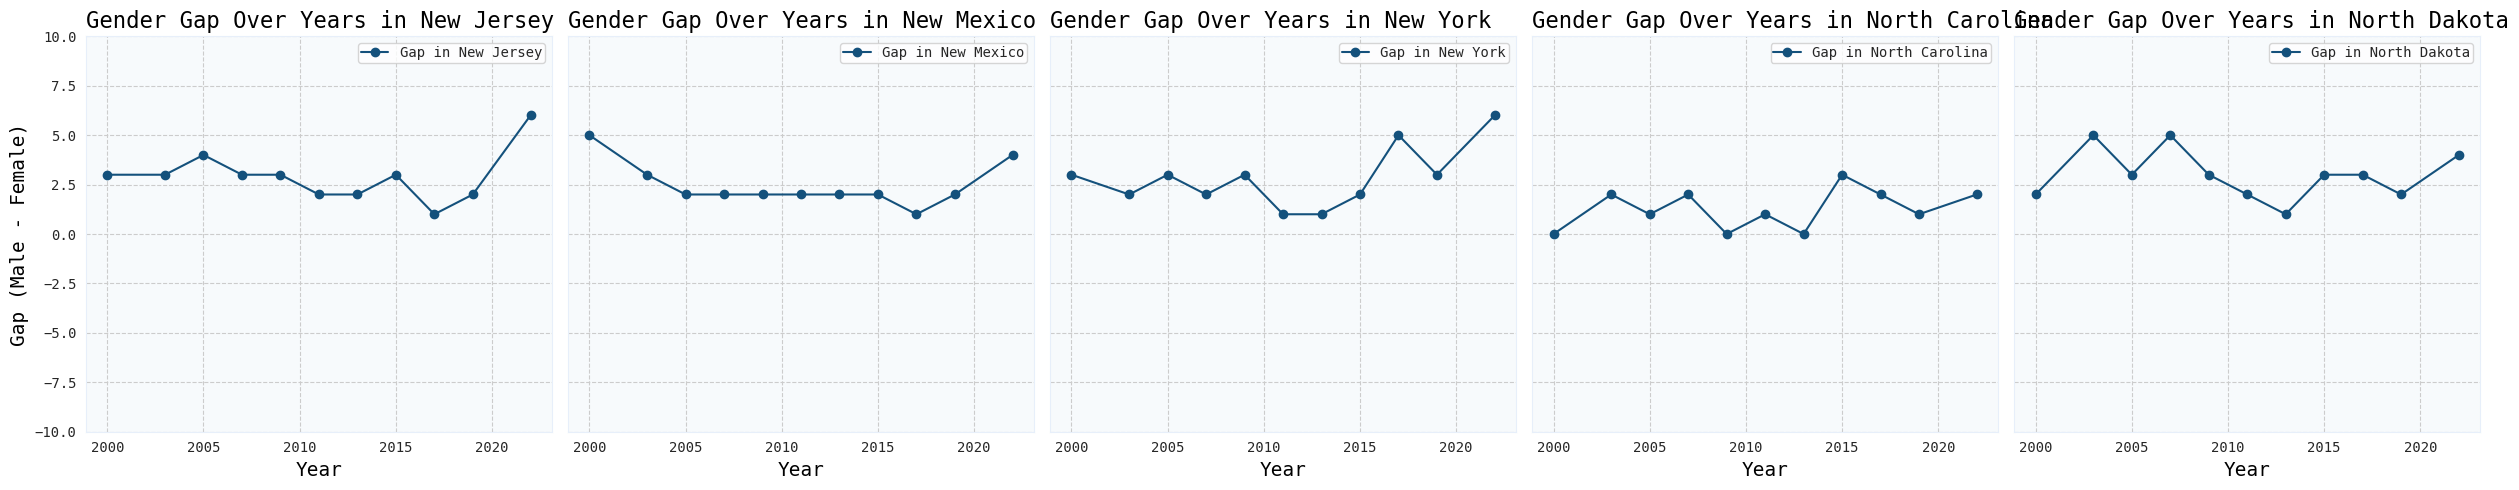

In [14]:
plotting(states_7)

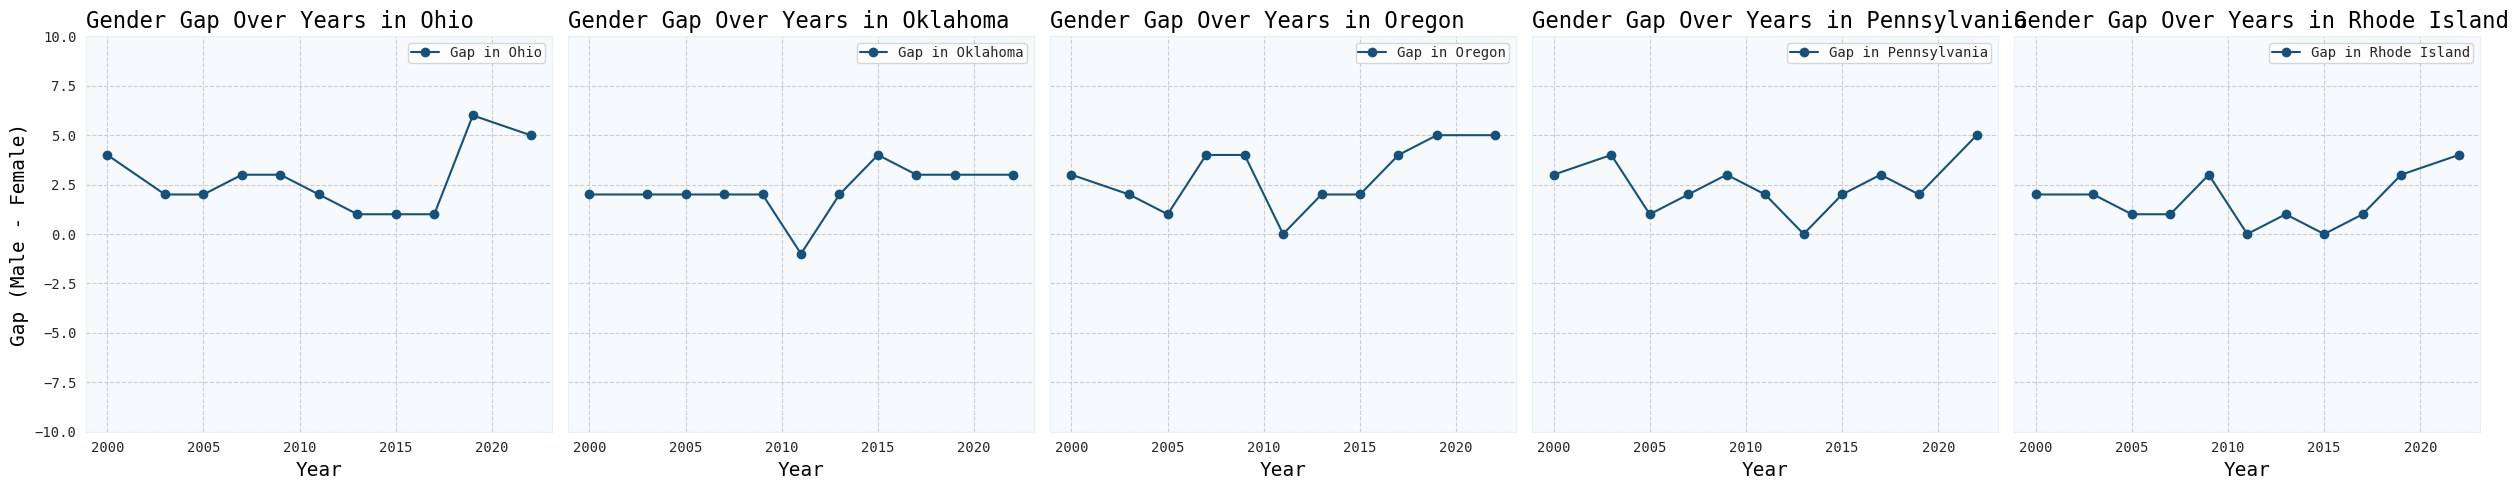

In [15]:
plotting(states_8)

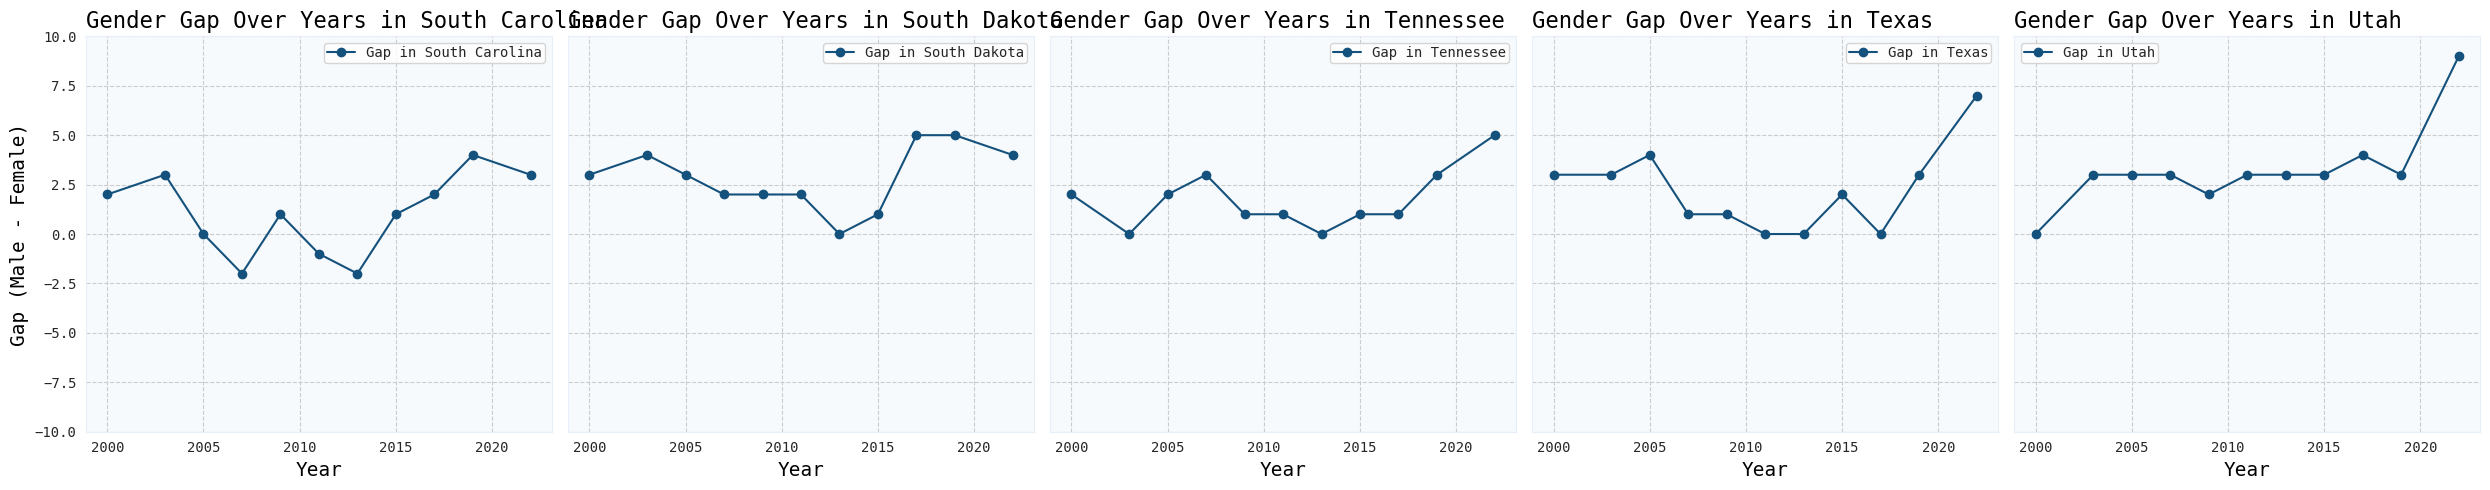

In [16]:
plotting(states_9)

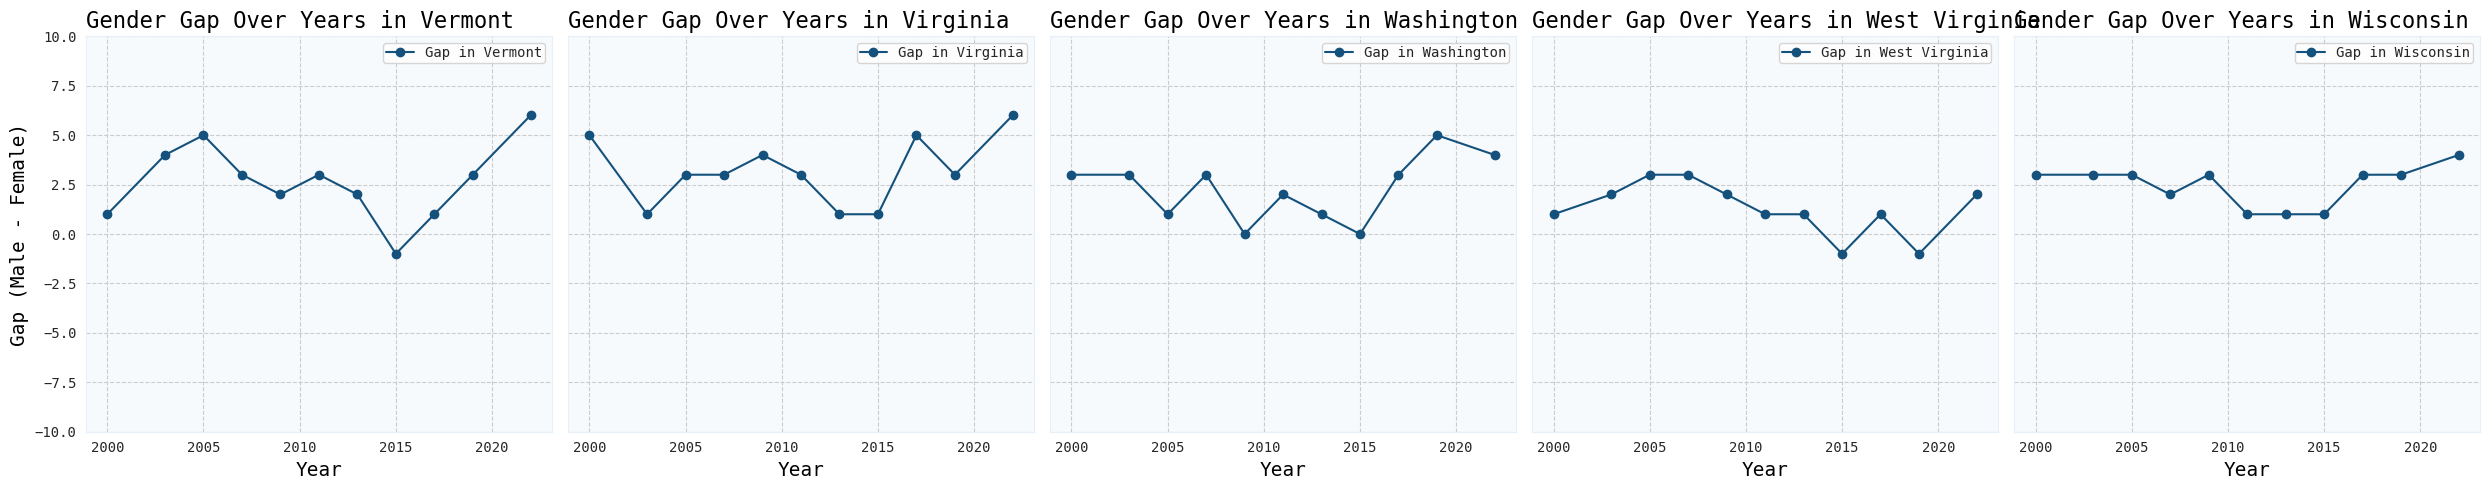

In [17]:
plotting(states_10)

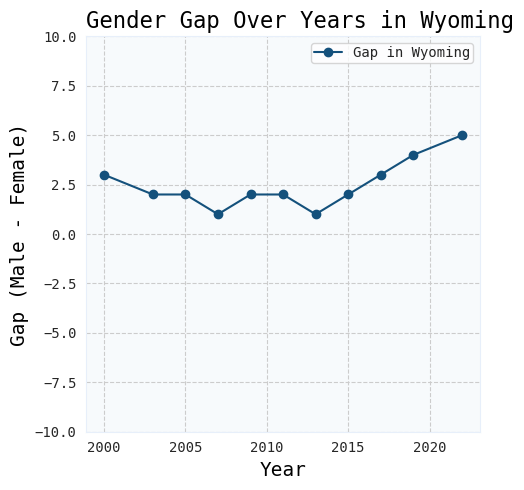

In [18]:
plotting(states_11)

In [19]:
import matplotlib.pyplot as plt
import numpy as np  # Assuming you're using numpy for data manipulation

def plot_all(states):
    plt.style.use('my_style')  # Apply the custom style

    # Calculate the number of rows needed for 5 states per row
    n_rows = int(np.ceil(len(states) / 5))
    
    # Create subplots with a shared y-axis (if desired), arranged in rows and columns
    fig, axs = plt.subplots(n_rows, 5, figsize=(25, 5 * n_rows), sharey=True, constrained_layout=True)
    
    # Flatten axs array for easy iteration if it's 2D (which it will be if n_rows > 1)
    axs = axs.flatten()
    
    for i, state in enumerate(states):
        state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
        axs[i].plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
        axs[i].set_title(f'Gender Gap Over Years in {state}')
        axs[i].set_xlabel('Year')
        if i % 5 == 0:  # Add y-label only to the first plot in each row to avoid repetition
            axs[i].set_ylabel('Gap (Male - Female)')
        axs[i].set_ylim(-10, 10)
        axs[i].grid(True)
        axs[i].legend()
    
    # Hide any unused subplots if the total number of states is not a multiple of 5
    for ax in axs[len(states):]:
        ax.set_visible(False)

    plt.show()


In [20]:
states_all = data['Jurisdiction'].unique()

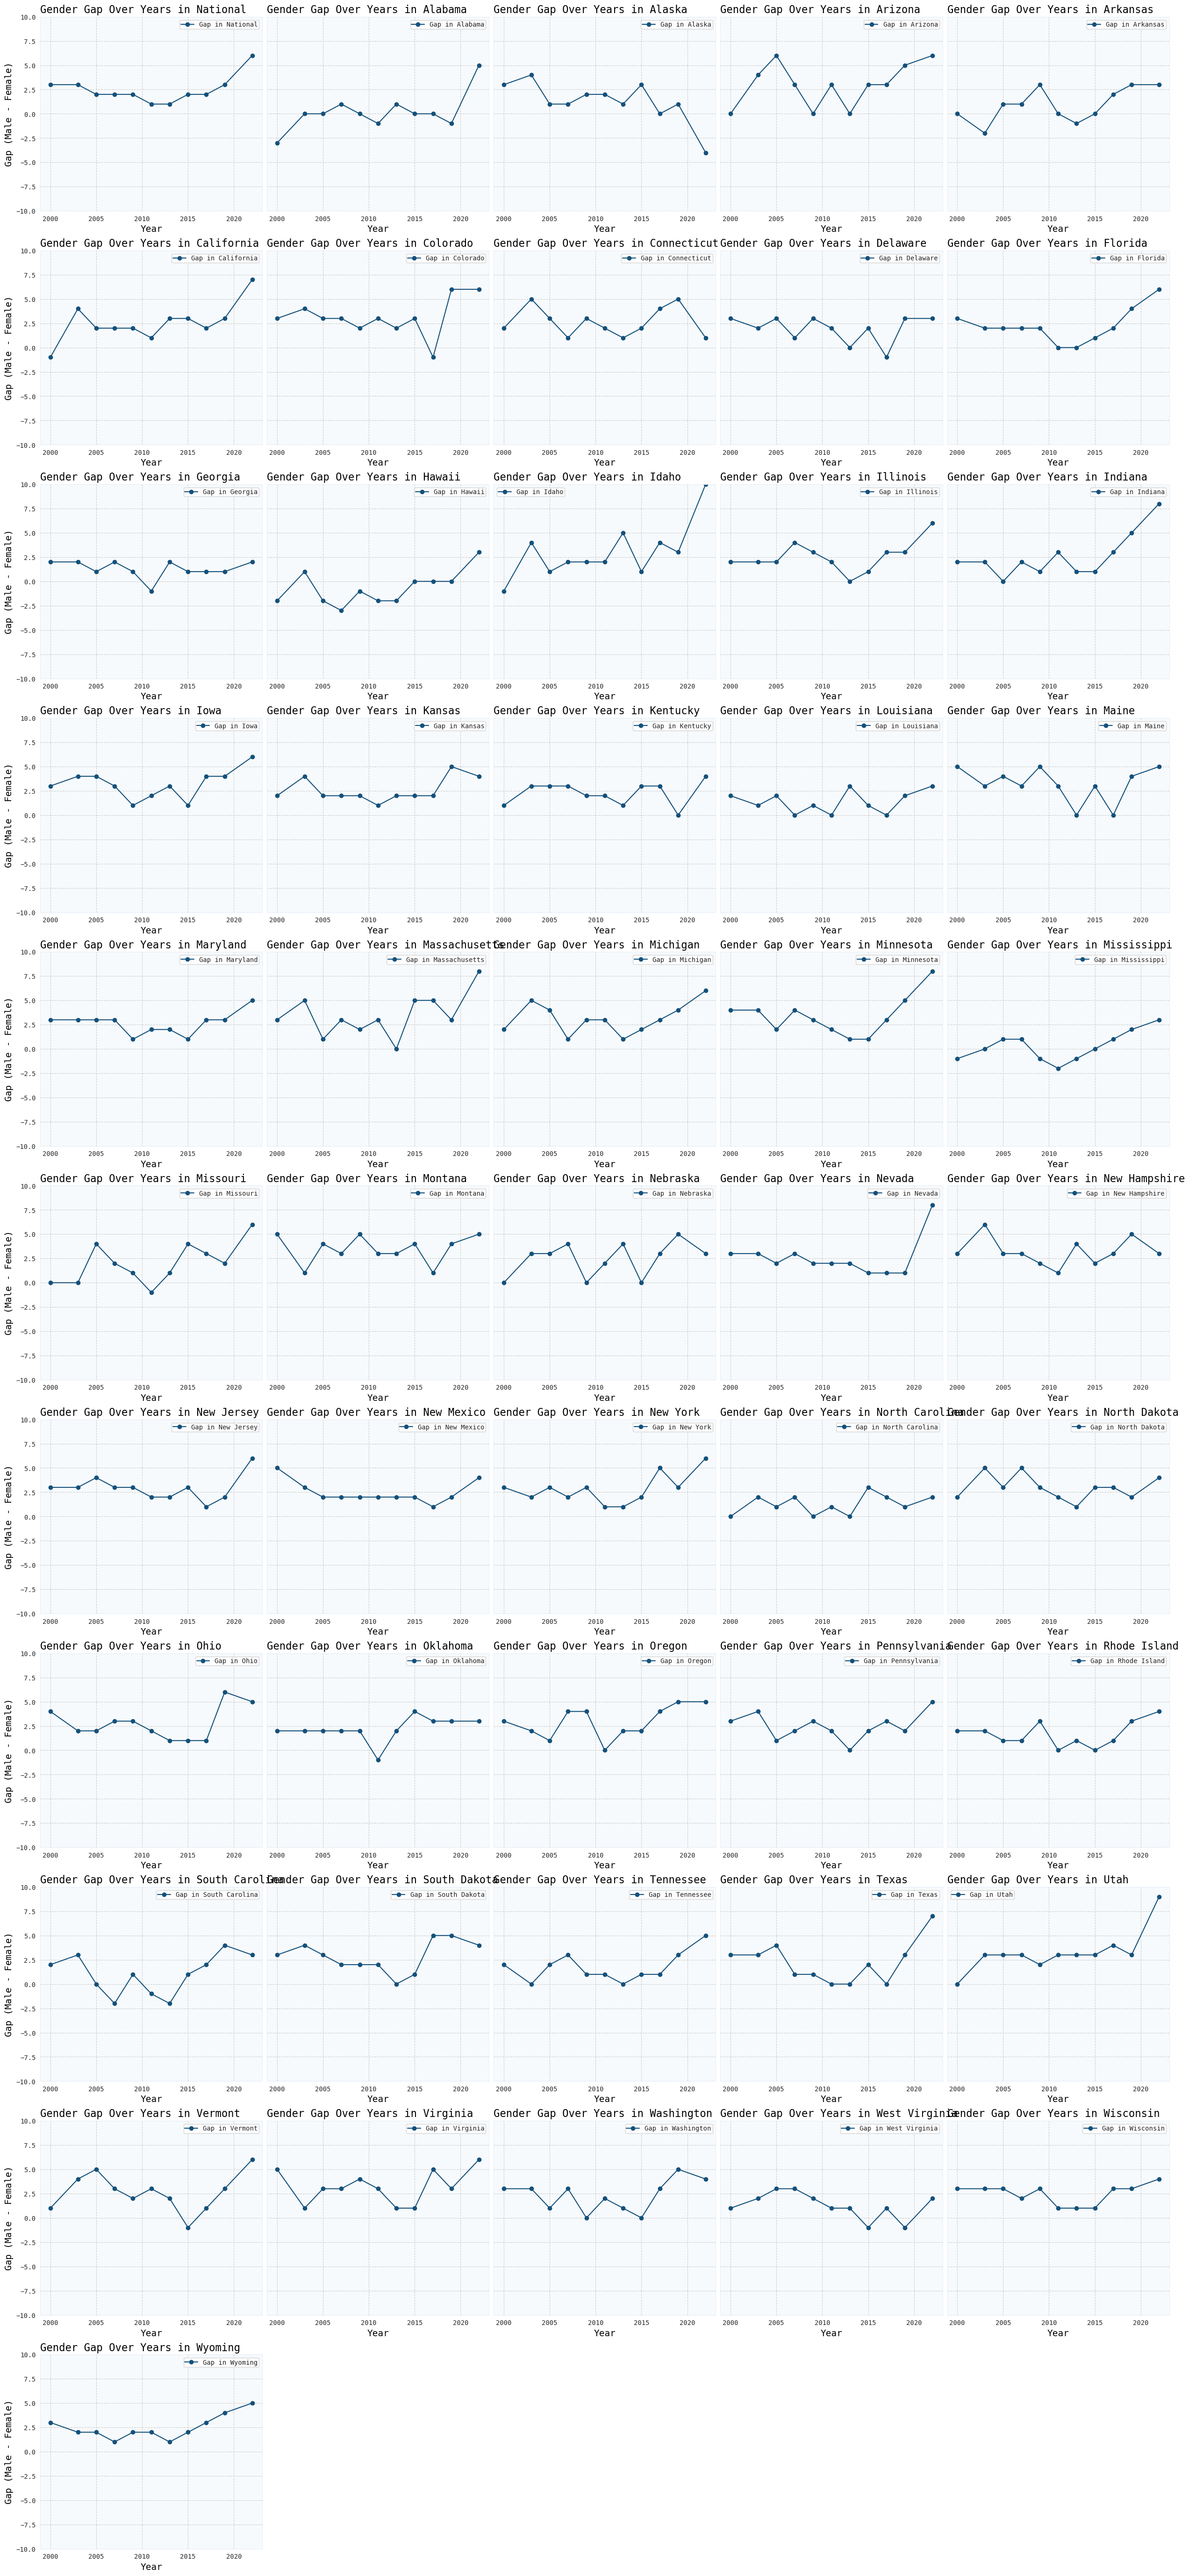

In [21]:
plot_all(states_all)